In [1]:
import numpy as np 
import pandas as pd 
import os
from matplotlib import pyplot as plt 
import cv2 as cv

# Look at Some Images

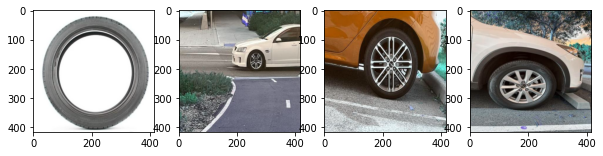

In [2]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("../input/sptire/train/images/14_19_l_jpg.rf.8323d9f848377e32ca451017a3a80731.jpg")
ax[0].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0719_JPEG.rf.05f197445c4a42854e0b1f308fb4e636.jpg")
ax[1].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0680_JPEG.rf.560c49e01182db8356989ddc604557fb.jpg")
ax[2].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0701_JPEG.rf.d5ae66ab383142ef5d59b0454a19fdce.jpg")
ax[3].imshow(image)
fig.show()

# Create the File System

In [3]:
%cd ../
!mkdir tmp
%cd tmp

/kaggle
/kaggle/tmp


# Download YoloV5

In [4]:
# Download YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 15814 (delta 9), reused 22 (delta 2), pack-reused 15769
Receiving objects: 100% (15814/15814), 14.59 MiB | 3.11 MiB/s, done.
Resolving deltas: 100% (10823/10823), done.
/kaggle/tmp/yolov5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
/kaggle/tmp
Setup complete. Using torch

# New YAML file

Create new Yaml file to fit the file system. 

In [5]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '../../input/sptire/train',
    val = '../../input/sptire/valid',
    nc = 1,
    names = ['Tire']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [6]:
%cd yolov5

/kaggle/tmp/yolov5


# Train the Yolov5 Model

In [7]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data ../data.yaml --weights yolov5n.pt

W&B disabled.
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5n.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, 

# Model Validation Output

Let's look at how the model performed on a validation batch

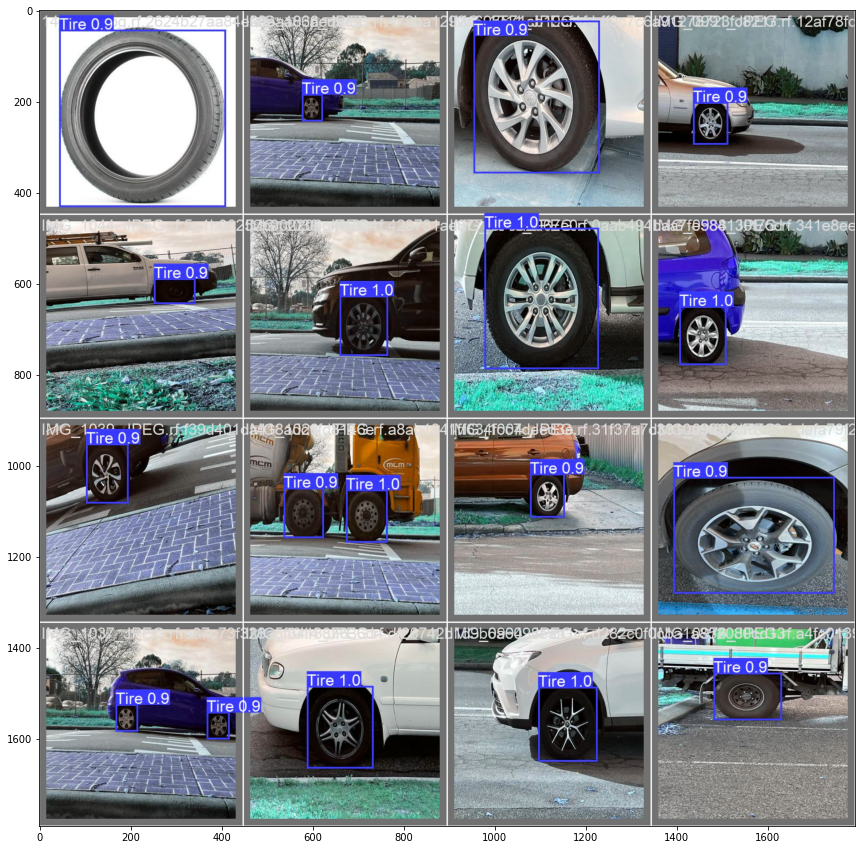

In [8]:
img = cv.imread("runs/train/exp/val_batch0_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

# Test the model

This will test the model we have created against an image it has not seen previously.

In [9]:
!python detect.py --source ../../input/sptire/test/images/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg --weights runs/train/exp/weights/best.pt

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['runs/train/exp/weights/best.pt'], source=../../input/sptire/test/images/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hid

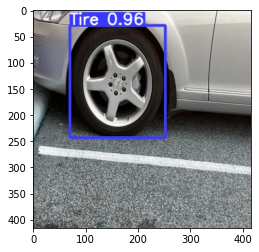

In [10]:
img = cv.imread("runs/detect/exp/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg")
plt.imshow(img)

# Conclusion

This shows YoloV5 being effective with this dataset. I am keen to see what you can do with the dataset :).